<img src="fadesp.png" alt="drawing" width="25%"/>


# DESAFIO ETL:
## Nome: Diego Matheus dos Santos da silva


### Step 1: Importing libraries

In [1]:
#importing the libraries
import pandas as pd
import requests
from io import StringIO
import sqlite3
import matplotlib.pyplot as plt


### Step 2: Data Loading

In [2]:


#extracting the dataset directly from the github repository
url = "https://raw.githubusercontent.com/jralbbuquerque/desafio-fadesp-processo-seletivo/master/data/dataset_desafio_fadesp.csv"
response = requests.get(url)
csv = response.text
df = pd.read_csv(StringIO(csv))
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### Step 3: Data Cleaning

In [3]:
#Checking for null values
check_null = df.isna().sum()  # Calculates the count of null values per column
null_columns = check_null[check_null > 0]  # only columns with nulls

null_columns

Postal Code    41296
dtype: int64

In [4]:
#only the postal code column with nulls, then replace with 0

df.fillna(0, inplace=True)

df[['Postal Code']]

,Postal Code
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
51285,94533.0
51286,0.0
51287,0.0
51288,0.0


In [5]:

#leaving date columns in the correct format
df['Order Date'] = pd.to_datetime(df['Order Date'].str.replace('-', '/'), format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'].str.replace('-', '/'), format='%d/%m/%Y')

#standardizing date format to mm/dd/yyyy
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')
df['Ship Date'] = df['Ship Date'].dt.strftime('%Y-%m-%d')

df[['Order Date','Ship Date']].head(5)

,Order Date,Ship Date
0,2011-01-01,2011-01-06
1,2011-01-01,2011-01-08
2,2011-01-01,2011-01-05
3,2011-01-01,2011-01-05
4,2011-01-01,2011-01-08


### Step 4: Storing the dataframe in the SQLite database in key-value format

In [6]:
#Connect to the database
conn = sqlite3.connect('dataset.db')
#Storing the Dataframe in an SQLite database
df.to_sql("dataset", conn, if_exists="replace", index=False)

51290

### Step 5: Data Visualization to Explore Data Distribution

#### Function to Generate the Graph

In [7]:
def plot_graph(query, x_label, y_label, title):
    conn = sqlite3.connect('dataset.db')
    cur = conn.cursor()
    cur.execute(query)
    result = cur.fetchall()
    x_values = [r[0] for r in result]
    y_values = [r[1] for r in result]
    conn.close()

    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_values, color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Graph: Sales for Region

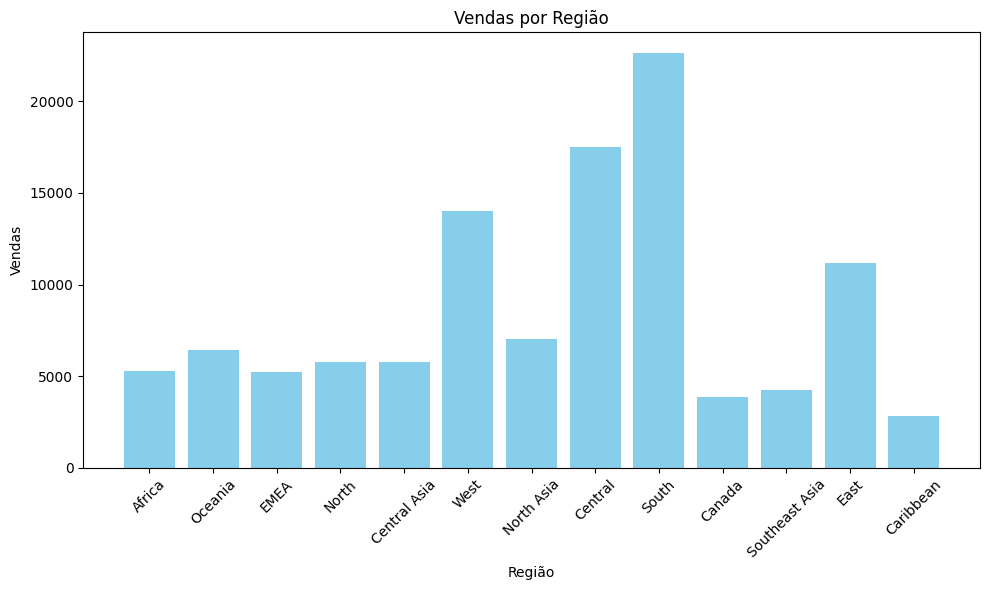

In [8]:
#defining the query in sqlite to plot the graph Sales for Region.
query = "SELECT Region, Sales FROM dataset;"
plot_graph(query, 'Região', 'Vendas', 'Vendas por Região')

#### Graph: Sales for Segment

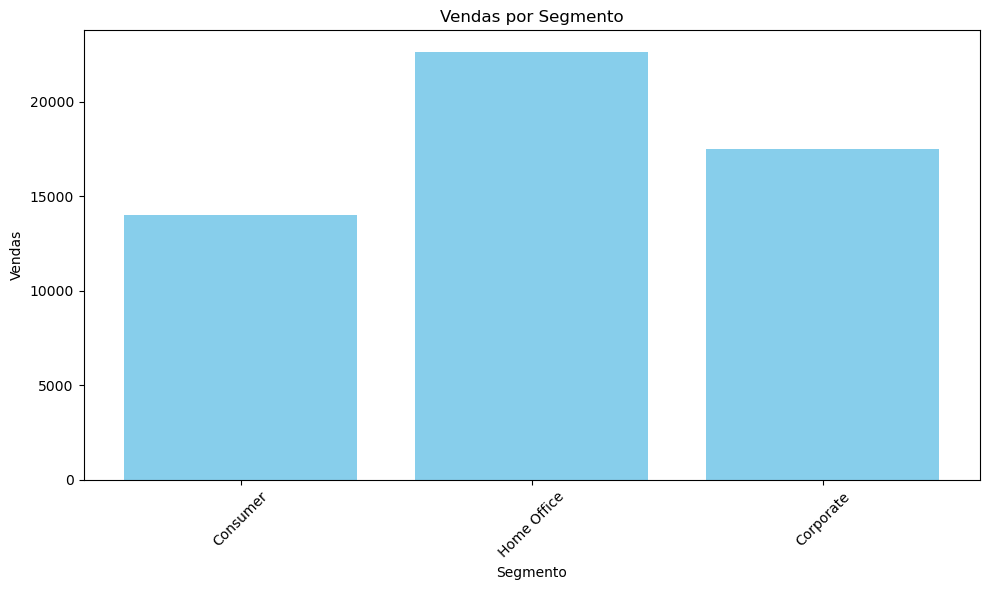

In [78]:
#defining the query in sqlite to plot the graph Sales for Segment.
query = "SELECT Segment, Sales FROM dataset;"
plot_graph(query, 'Segmento', 'Vendas', 'Vendas por Segmento')

#### Graph: Seasonal Sales

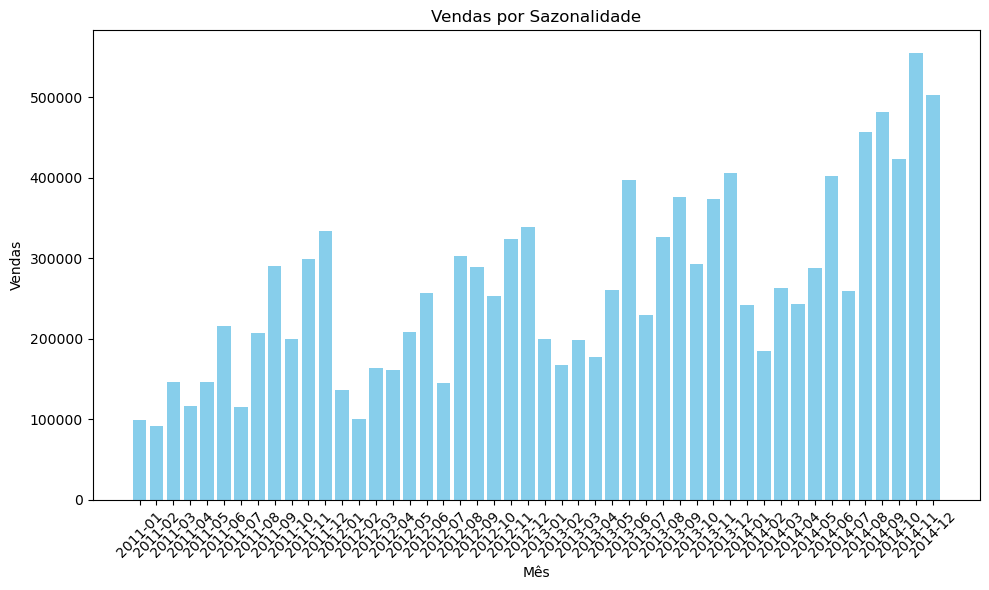

In [75]:
#defining the query in sqlite to plot the graph Seasonal Sales.
query = 'SELECT strftime("%Y-%m", "Order Date") as Month, SUM(Sales) as TotalSales FROM dataset GROUP BY Month;'
plot_graph(query, 'Mês', 'Vendas', 'Vendas por Sazonalidade')

Graph: Profit per Year

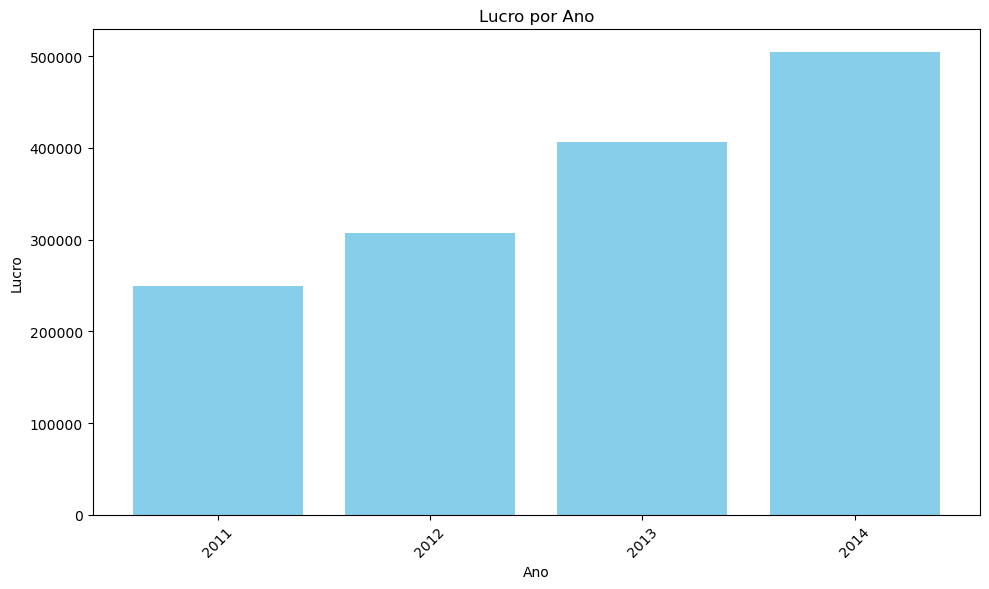

In [77]:
#defining the query in sqlite to plot the graph Profit per Year.
query = 'SELECT strftime("%Y", "Order Date") as Year, SUM(Profit) as TotalProfit FROM dataset GROUP BY Year;'
plot_graph(query, 'Ano', 'Lucro', 'Lucro por Ano')